# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import zipfile
from google.colab import files
from sklearn.model_selection import train_test_split

# Arquivos

In [ ]:
upload = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
with zipfile.ZipFile('dataset.zip') as z:
  train = pd.read_csv(
z.open
('train.csv'))
  features = pd.read_csv(
z.open
('features.csv'))
  stores = pd.read_csv(
z.open
('stores.csv')) 

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


# UNINDO AS TABELAS

In [ ]:
train_stores = pd.merge(train, stores, how='left', on='Store')

In [ ]:
train_stores

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [ ]:
df = pd.merge(train_stores, features, on=['Store', 'Date'],how='left')

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [ ]:
df.isnull().sum()/len(df)

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday_x     0.000000
Type            0.000000
Size            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
CPI             0.000000
Unemployment    0.000000
IsHoliday_y     0.000000
dtype: float64

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df.drop(['IsHoliday_x'], axis = 1,inplace=True)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


# TRATAMENTO DOS DADOS

In [ ]:
df[['Store','Dept']] = df[['Store','Dept']].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  category
 1   Dept          421570 non-null  category
 2   Date          421570 non-null  object  
 3   Weekly_Sales  421570 non-null  float64 
 4   Type          421570 non-null  object  
 5   Size          421570 non-null  int64   
 6   Temperature   421570 non-null  float64 
 7   Fuel_Price    421570 non-null  float64 
 8   MarkDown1     150681 non-null  float64 
 9   MarkDown2     111248 non-null  float64 
 10  MarkDown3     137091 non-null  float64 
 11  MarkDown4     134967 non-null  float64 
 12  MarkDown5     151432 non-null  float64 
 13  CPI           421570 non-null  float64 
 14  Unemployment  421570 non-null  float64 
 15  IsHoliday_y   421570 non-null  bool    
dtypes: bool(1), category(2), float64(10), int64(1), object(2)
memory usage: 46

In [ ]:
df.drop(['Date'], axis = 1,inplace=True)
df

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,628.10,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,1061.02,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,760.01,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [ ]:
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Store         421570 non-null  category
 1   Dept          421570 non-null  category
 2   Weekly_Sales  421570 non-null  float64 
 3   Type          421570 non-null  object  
 4   Size          421570 non-null  int64   
 5   Temperature   421570 non-null  float64 
 6   Fuel_Price    421570 non-null  float64 
 7   MarkDown1     421570 non-null  float64 
 8   MarkDown2     421570 non-null  float64 
 9   MarkDown3     421570 non-null  float64 
 10  MarkDown4     421570 non-null  float64 
 11  MarkDown5     421570 non-null  float64 
 12  CPI           421570 non-null  float64 
 13  Unemployment  421570 non-null  float64 
 14  IsHoliday_y   421570 non-null  bool    
dtypes: bool(1), category(2), float64(10), int64(1), object(1)
memory usage: 43.0+ MB


In [ ]:
df.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [ ]:
df.describe()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [ ]:
df.describe(include='category')

,Store,Dept
count,421570,421570
unique,45,81
top,13,1
freq,10474,6435


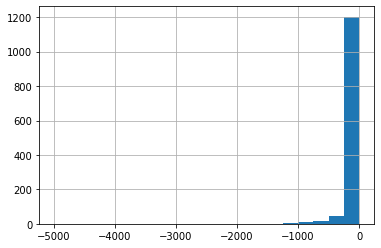

In [ ]:
df[df['Weekly_Sales'] < 0]['Weekly_Sales'].hist(bins=20)

In [ ]:
df[df['Weekly_Sales'] < 0]

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
846,1,6,-139.65,A,151315,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,False
2384,1,18,-1.27,A,151315,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143,False
6048,1,47,-863.00,A,151315,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,False
6049,1,47,-698.00,A,151315,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106,False
6051,1,47,-58.00,A,151315,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,-0.43,B,118221,27.73,2.773,0.00,0.0,0.00,0.00,0.00,181.982317,8.992,True
419598,45,80,-0.27,B,118221,31.27,2.745,0.00,0.0,0.00,0.00,0.00,182.034782,8.992,False
419603,45,80,-1.61,B,118221,54.28,2.899,0.00,0.0,0.00,0.00,0.00,181.692477,8.899,False
419614,45,80,-0.27,B,118221,76.61,2.815,0.00,0.0,0.00,0.00,0.00,182.318780,8.743,False


In [ ]:
df = df[df['Weekly_Sales'] >= 0]
df

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,24924.50,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,1,46039.49,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,1,41595.55,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,1,19403.54,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,1,21827.90,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,628.10,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,1061.02,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,760.01,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False


In [ ]:
df.describe()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,16030.329773,136749.569176,60.090474,3.360888,2590.187246,878.803239,468.771234,1083.462694,1662.706138,171.212152,7.960077
std,22728.500149,60992.688568,18.448260,0.458523,6053.225499,5076.525234,5533.593112,3895.801513,4205.946641,39.162280,1.863873
min,0.000000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,2117.560000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,7659.090000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000
75%,20268.380000,202505.000000,74.280000,3.738000,2801.500000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000
max,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [ ]:
df[df['MarkDown3'] < 0]

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
267102,28,1,16711.36,A,206302,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,False
267245,28,2,60649.41,A,206302,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,False
267388,28,3,7754.15,A,206302,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,False
267531,28,4,30868.99,A,206302,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,False
267674,28,5,24278.55,A,206302,84.83,4.103,9026.85,101.2,-29.1,833.67,11752.37,130.889677,11.627,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370315,39,94,60054.15,A,184109,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,False
370458,39,95,109647.52,A,184109,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,False
370601,39,96,26633.01,A,184109,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,False
370744,39,97,24556.59,A,184109,69.11,3.814,5821.79,0.0,-0.2,164.58,8663.37,220.301448,6.989,False


In [ ]:
df[df['MarkDown2'] < 0]

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
29629,4,1,37148.64,A,205863,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,False
29772,4,2,94894.85,A,205863,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,False
29915,4,3,11416.47,A,205863,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,False
30058,4,4,53921.90,A,205863,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,False
30201,4,5,43779.18,A,205863,59.07,3.759,8806.80,-10.5,5.99,739.14,4396.97,130.896645,4.607,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390864,41,97,23337.75,A,196321,69.07,3.558,6068.27,-20.0,85.74,3710.05,2287.85,198.098420,6.432,False
390995,41,98,10433.00,A,196321,57.29,3.764,9160.25,-2.0,127.56,1850.68,2652.68,197.621895,6.547,False
391007,41,98,9822.45,A,196321,69.07,3.558,6068.27,-20.0,85.74,3710.05,2287.85,198.098420,6.432,False
391041,41,99,29.88,A,196321,57.29,3.764,9160.25,-2.0,127.56,1850.68,2652.68,197.621895,6.547,False


## Variáveis categóricas

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Store'],prefix='Store',prefix_sep='')],axis = 1)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Dept'],prefix='Dept',prefix_sep='')],axis = 1)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Type'],prefix='Type',prefix_sep='')],axis = 1)

In [ ]:
df['IsHoliday_y'] = df['IsHoliday_y'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Columns: 144 entries, Store to TypeC
dtypes: category(2), float64(10), int64(2), object(1), uint8(129)
memory usage: 97.4+ MB


In [ ]:
df.drop(['Store','Dept','Type'], axis = 1,inplace=True)

In [ ]:
df.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,Store10,Store11,Store12,Store13,Store14,Store15,Store16,Store17,Store18,Store19,Store20,Store21,Store22,Store23,Store24,Store25,Store26,Store27,Store28,...,Dept46,Dept47,Dept48,Dept49,Dept50,Dept51,Dept52,Dept54,Dept55,Dept56,Dept58,Dept59,Dept60,Dept65,Dept67,Dept71,Dept72,Dept74,Dept77,Dept78,Dept79,Dept80,Dept81,Dept82,Dept83,Dept85,Dept87,Dept90,Dept91,Dept92,Dept93,Dept94,Dept95,Dept96,Dept97,Dept98,Dept99,TypeA,TypeB,TypeC
0,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Análise da amostra

In [ ]:
df_sample = df.sample(1000)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 79956 to 354191
Columns: 141 entries, Weekly_Sales to TypeC
dtypes: float64(10), int64(2), uint8(129)
memory usage: 227.5 KB


In [ ]:
df_sample.shape

(1000, 141)

## Variaveis e resposta

In [ ]:
y = df_sample[['Weekly_Sales']]

In [ ]:
X = df_sample.drop(['Weekly_Sales'], axis = 1,inplace=False)

## Treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## Padronização de variaveis

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns) 

## Treinando os modelos

### Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred) 

22460183956541.332

In [ ]:
# RMSE import
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# RMSE score
mean_squared_error(y_test, y_pred, squared=False)

194510898728370.1

## Outros modelos

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor 

In [ ]:
modelos = {'HR':HuberRegressor(),
           'SGDR':SGDRegressor(),
           'GBR':GradientBoostingRegressor(),
           'RFR':RandomForestRegressor(),
           'ETR':ExtraTreesRegressor(),
           }

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
for nome, model in modelos.items():
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  print(nome,':',r2_score(y_test, y_pred))

HR : 0.5644287702506033
SGDR : 0.5552629191341303
GBR : 0.4960580030791666
RFR : 0.5598471207129689
ETR : 0.6328976305074683


# Ajuste de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'bootstrap': [True, False],
                         'max_depth': [None, 80, 110],
                         'max_features': [None, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]}

In [ ]:
model = ExtraTreesRegressor()

In [ ]:
gcv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

In [ ]:
gcv.fit(X_train, y_train)

In [ ]:
Best = gcv.best_estimator_

Best.fit(X_train,y_train)
y_pred = Best.predict(X_test)
print(nome,':',r2_score(y_test, y_pred))